In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


cuda
cuda:0


In [9]:
num_epochs = 10
train_acc_list, test_acc_list = [], []
for epoch in range(num_epochs):
    model.train()
    correct, total = 0, 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc = correct / total
    train_acc_list.append(train_acc)

    # Evaluate on test data
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc = correct / total
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Epoch 1/10, Train Accuracy: 0.4185, Test Accuracy: 0.5348
Epoch 2/10, Train Accuracy: 0.5258, Test Accuracy: 0.5905
Epoch 3/10, Train Accuracy: 0.5751, Test Accuracy: 0.6330
Epoch 4/10, Train Accuracy: 0.6042, Test Accuracy: 0.6442
Epoch 5/10, Train Accuracy: 0.6262, Test Accuracy: 0.6629
Epoch 6/10, Train Accuracy: 0.6432, Test Accuracy: 0.6778
Epoch 7/10, Train Accuracy: 0.6602, Test Accuracy: 0.6824
Epoch 8/10, Train Accuracy: 0.6705, Test Accuracy: 0.6785
Epoch 9/10, Train Accuracy: 0.6848, Test Accuracy: 0.6930
Epoch 10/10, Train Accuracy: 0.6949, Test Accuracy: 0.7041


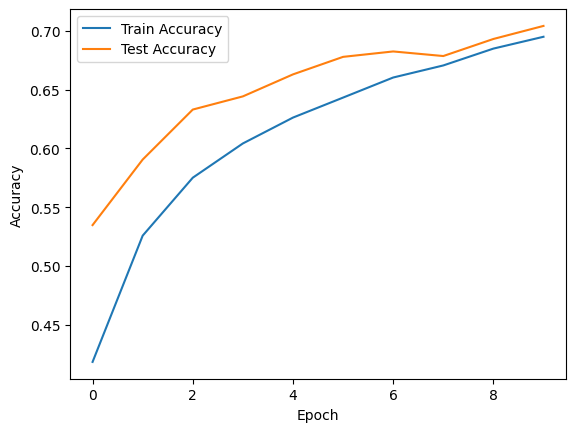

In [10]:
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()